In [ ]:
'''
Program written by Keunwoo Kim(F429147). This program displays a summary table of the five highest rank values between input years.
The summary also includes the overall rank value average for each artist and the annual average rank value in the column, and it is beneficial when 
compare.
In terms of visualization, the summary table has been plotted in a line graph to enhance understanding.
'''

In [489]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output

In [490]:
conn = sqlite3.connect('CWDatabase.db')
query = "SELECT Master_ID, Year, ArtistName, Popularity FROM MasterID"
pd.set_option('display.float_format', lambda x: f'{x:.2f}') 
df = pd.read_sql_query(query, conn)

In [491]:
#df filtering
df_top5 = df.groupby(['Year', 'ArtistName'])['Popularity'].size().reset_index(name="Number_of_Songs")

average_popularity = df.groupby(['ArtistName', 'Year'])['Popularity'].mean().reset_index(name="Average_Popularity")

artist_summary = pd.merge(df_top5, average_popularity, on=["ArtistName", "Year"], how="left")

artist_summary['Rankvalue'] = (
    artist_summary['Number_of_Songs'] * 0.4 +
    artist_summary['Average_Popularity'] * 0.6
)

annual_avg_rankvalue = artist_summary.groupby('Year')['Rankvalue'].mean().reset_index(name="Annual_Average_Rankvalue")
artist_avg_rankvalue = artist_summary.groupby('ArtistName')['Rankvalue'].mean().reset_index(name="Artist_Average_Rankvalue")
artist_summary = pd.merge(artist_summary, annual_avg_rankvalue, on="Year", how="left")
top5_summary = pd.merge(artist_summary, artist_avg_rankvalue, on="ArtistName", how="left")
print(top5_summary)

    Year       ArtistName  Number_of_Songs  Average_Popularity  Rankvalue  \
0   1999              DMX                1               71.00      43.00   
1   2001              112                1               63.00      38.20   
2   2001          Afroman                1               68.00      41.20   
3   2001  Destiny's Child                1               70.00      42.40   
4   2001            JAY-Z                1               63.00      38.20   
..   ...              ...              ...                 ...        ...   
69  2019     Paulo Londra                1               72.00      43.60   
70  2019           Polo G                1               78.00      47.20   
71  2019    Russ Millions                1               69.00      41.80   
72  2019             Sech                1               71.00      43.00   
73  2019          Stormzy                1               64.00      38.80   

    Annual_Average_Rankvalue  Artist_Average_Rankvalue  
0                 

In [492]:
#Function defs

def display_line(symbol="*",line_size=10):
    line=line_size*symbol
    print(line)


def display_msg(msg="hello"):
    display_line()
    print("!!!"+msg+"!!!")
    display_line()

def display_menu():
    display_msg("Menu")
    print("s) Summary by Year")
    print("p) Plot Rank Value Comparison")
    print("c) Clear Screen")
    print("e) Exit Program")

def plot_rankvalue_comparison():
    try:
        start_year = int(input("Enter the starting year (1998-2020): "))
        end_year = int(input("Enter the ending year (1998-2020): "))

        filtered_year = top5_summary[
            (top5_summary['Year'] >= start_year) & (top5_summary['Year'] <= end_year)
        ]

        top5_artists = (
            filtered_year.sort_values(by='Rankvalue', ascending=False)
            .drop_duplicates(subset=['ArtistName'])
            .head(5)
            .reset_index()
        )
        
        yearly_avg_rankvalue = top5_summary.groupby('Year')['Rankvalue'].mean()

        plt.figure(figsize=(11,6))

        for artist in top5_artists['ArtistName']:
            artist_data = filtered_year[filtered_year['ArtistName'] == artist]
            plt.plot(
            artist_data['Year'],
            artist_data['Rankvalue'],
            label=f"{artist}",
            marker='o'
        )

        avg_data = yearly_avg_rankvalue[(yearly_avg_rankvalue.index >= start_year) & 
                                        (yearly_avg_rankvalue.index <= end_year)]
        plt.plot(
            avg_data.index, 
            avg_data.values, 
            label="Yearly Average", 
            color='red', 
            linestyle='--', 
            marker='o'
        )

        plt.title(f"Top 5 Artists' Rank Values and Yearly Average ({start_year}-{end_year})")
        plt.xlabel("Year")
        plt.ylabel("Rank Value")
        plt.legend()
        plt.grid(True)
        plt.show()

    except Exception as e:
        print(f"Error occurred: {e}")

def display_summary_by_year():
    try:
        start_year = int(input("Enter the starting year (1998-2020): "))
        end_year = int(input("Enter the ending year (1998-2020): "))

        filtered_year = top5_summary[
            (top5_summary['Year'] >= start_year) & (top5_summary['Year'] <= end_year)
        ]
        filtered_year['Year'] = filtered_year['Year'].astype(int)

        top5_artists = (
            filtered_year.sort_values(by='Rankvalue', ascending=False)
            .drop_duplicates(subset=['ArtistName'])
            .head(5)
            .reset_index()
        )

        pivot_table = top5_artists.pivot_table(
            index="ArtistName", columns="Year", values="Rankvalue", aggfunc="mean"
        )

        overall_avg_rankvalue = top5_summary.groupby('ArtistName')['Rankvalue'].mean()
        pivot_table["Overall Average"] = overall_avg_rankvalue 

        yearly_avg_rankvalue = top5_summary.groupby('Year')['Rankvalue'].mean()

        pivot_table.loc["Yearly Average"] = yearly_avg_rankvalue 
        
        print("\n=== Top 5 Artists by Avg Rankvalue ===")
        print(pivot_table)
    except Error as e:
        print(f"Error occurred: {e}")


**********
!!!Menu!!!
**********
s) Summary by Year
p) Plot Rank Value Comparison
c) Clear Screen
e) Exit Program


Please enter your option ㅔ


Invalid option. Please try again.


Please enter your option p
Enter the starting year (1998-2020):  1998
Enter the ending year (1998-2020):  2020


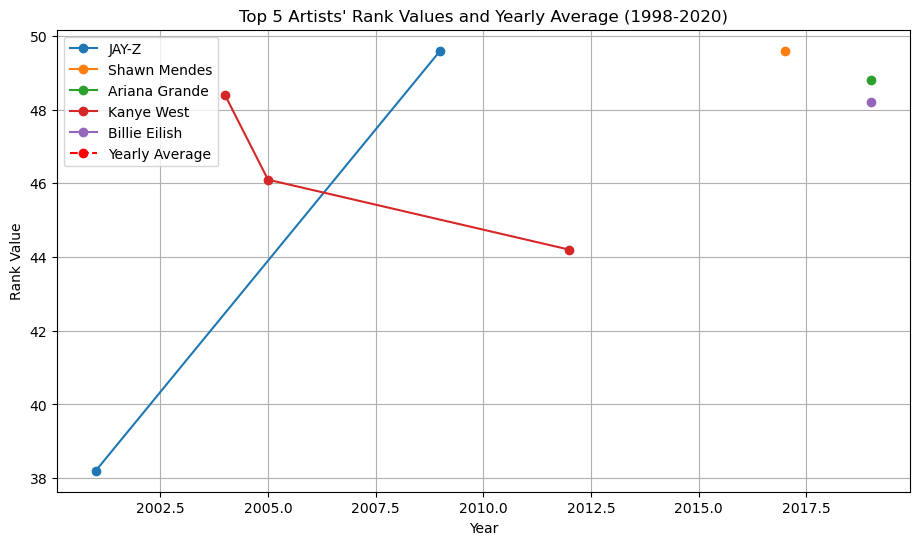

Please enter your option e


Exiting the program.


In [493]:
display_menu()

while True: 
    opt=input("Please enter your option")
    if opt== "s":
        display_summary_by_year()
    elif opt== "p":
        plot_rankvalue_comparison()
    elif opt=="c":
        clear_output()
        display_menu()
    elif opt== "e":
        print("Exiting the program.")
        break
    else:
        print("Invalid option. Please try again.")